# Tensions 2D plots
pyplot edition.

A. Mastbaum <mastbaum@physics.rutgers.edu>, 2021/06

In [196]:
from collections import namedtuple
import numpy as np
import uproot
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import FixedLocator, FormatStrFormatter, MultipleLocator, LogLocator, AutoLocator, AutoMinorLocator
from matplotlib.ticker import MaxNLocator
from astropy.stats import binom_conf_interval, poisson_conf_interval
import pandas as pd

In [70]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams.update({
    'font.size': 16,
    'mathtext.rm'  : 'serif',
    'mathtext.it'  : 'serif',
    'mathtext.bf'  : 'serif',
    'mathtext.fontset': 'custom',
})

In [10]:
Generator = namedtuple('Generator', ['filename', 'title', 'color'])

In [367]:
gens = [
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/nuiscomp_20200708/nuiscomp_genie_g1802a0211a_20200708.root",
      "GENIE G1802a0211a", 600),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/nuiscomp_20200708/nuiscomp_genie_g1810a0211a_20200708.root",
      "GENIE G1810a0211a", 417),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/nuiscomp_20200708/nuiscomp_genie_g1810b0211a_20200708.root",
      "GENIE G1810b0211a", 633),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/nuiscomp_20200708/nuiscomp_nuwro_20200708.root",
      "NuWro 19.02.1", 800),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/nuiscomp_20200708/nuiscomp_neut_20200708.root",
      "NEUT 5.4.0", 880)
]

In [368]:
# Colors from ROOT
colors = list(map(lambda x: np.array(x, dtype=np.float)/255, [
    (  0,  21, 248),
    (  0, 205,  53),
    (208,   0,   7),
    (255, 202,  56),
    (203,   0, 248),
]))

## T2K CC0pi CH

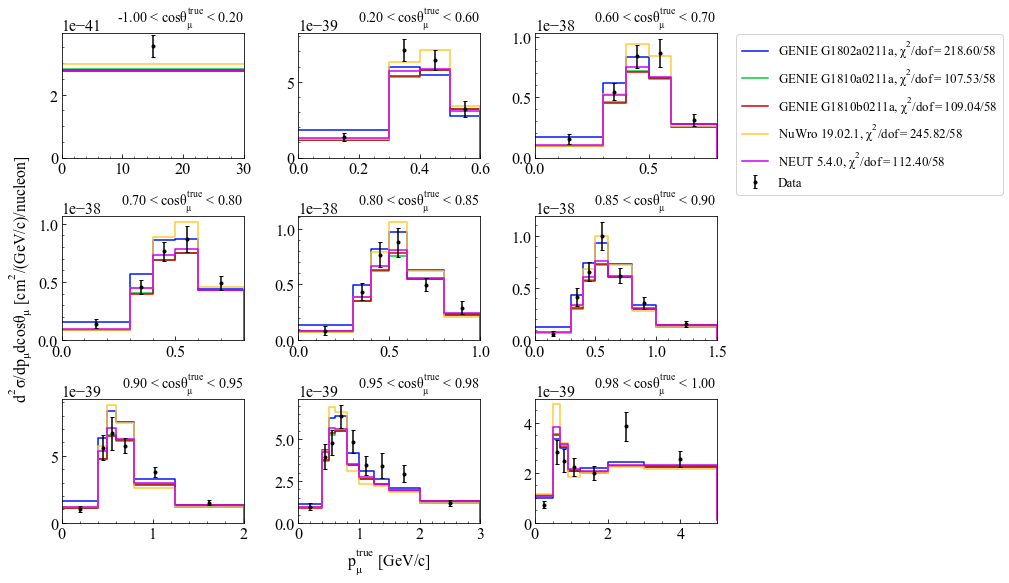

In [369]:
f = uproot.open(gens[0].filename)
objs = sorted(map(lambda x: x.decode('utf-8').split(';')[0] , filter(lambda x: 'T2K_NuMu_CC0pi_2DPcos_MC_Slice' in str(x), f.allkeys())))
f.close()

slices = [-1, 0.2, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.98, 1]

fig, axes = plt.subplots(3, 3, figsize=(14,8))

for i, oobj in enumerate(objs):
    for j, gen in enumerate(gens):
        ff = uproot.open(gen.filename)

        # Label with chi2
        label = gen.title
        chi2 = ff['likelihood_hist;1']
        ndof = ff['ndof_hist;1']
        c2n = zip(*(chi2.values, ndof.values))
        chi2s = dict(zip(*(chi2.xlabels, c2n)))
        key = 'T2K_NuMu_CC0pi_CH_XSec_2DPcos'
        label += ', $\\chi^2/dof=%1.2f/%i$' % chi2s[key]

        h, e = ff[oobj].numpy()
        ax = axes.flatten()[i]
        h = np.hstack((h, [h[-1]]))
        ax.step(e, h, label=label, where='post', color=colors[j])
        ax.set_xlim(e[0], e[np.maximum(1, np.max(np.argwhere(h>0))-1)])
        ax.tick_params(direction='in', length=4)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        
        ax.set_title(r'%1.2f < $\cos\theta_\mu^\mathrm{true}$ < %1.2f' % (slices[i], slices[i+1]), loc='right', fontsize=14)

        ax.tick_params(direction='in', length=2, which='minor')
        if i == 7:
            ax.set_xlabel(r'$p_\mu^\mathrm{true}$ [GeV/c]')
        if i == 3:
            ax.set_ylabel(r'$d^2\sigma/dp_\mu d\cos\theta_\mu$ [cm$^2$/(GeV/c)/nucleon]')
        
        if j == 0:
            h, e = ff[oobj.replace('MC', 'data')].numpy()
            err = np.sqrt(ff[oobj.replace('MC', 'data')].variances)
            e = e[:-1] + np.diff(e)/2
            ax.errorbar(e, h, err, fmt='.', color='black', label='Data', zorder=100, capsize=2)

for i, oobj in enumerate(objs):
    ax = axes.flatten()[i]
    ax.set_ylim(0, ax.get_ylim()[1])

plt.legend(bbox_to_anchor=(1, 0.96), bbox_transform=plt.gcf().transFigure, fontsize=13)
plt.subplots_adjust(top=0.95, bottom=0.1, left=0.06, right=0.71, wspace=0.3, hspace=0.47)

plt.savefig('T2K_NuMu_CC0pi_CH_2DPcos.pdf')
plt.show()

## T2K CC0pi C

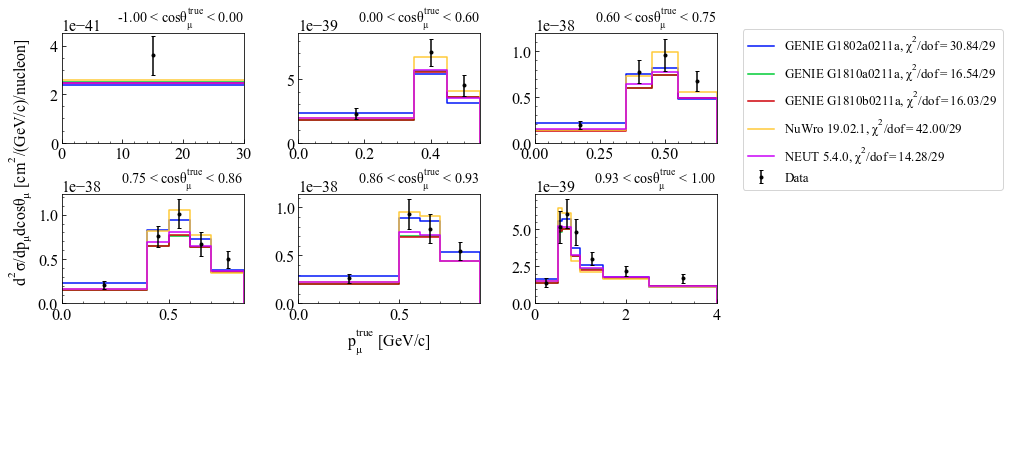

In [370]:
f = uproot.open(gens[0].filename)
objs = sorted(map(lambda x: x.decode('utf-8').split(';')[0] , filter(lambda x: 'T2K_NuMu_CC0pi_C_2DPcos_MC_Slice' in str(x), f.allkeys())))
f.close()

slices = [-1, 0., 0.6, 0.75, 0.86, 0.93, 1.]

fig, axes = plt.subplots(2, 3, figsize=(14,5))

for i, oobj in enumerate(objs):
    for j, gen in enumerate(gens):
        ff = uproot.open(gen.filename)

        # Label with chi2
        label = gen.title
        chi2 = ff['likelihood_hist;1']
        ndof = ff['ndof_hist;1']
        c2n = zip(*(chi2.values, ndof.values))
        chi2s = dict(zip(*(chi2.xlabels, c2n)))
        key = 'T2K_NuMu_CC0pi_C_XSec_2DPcos'
        label += ', $\\chi^2/dof=%1.2f/%i$' % chi2s[key]

        h, e = ff[oobj].numpy()
        ax = axes.flatten()[i]
        h = np.hstack((h, [h[-1]]))
        ax.step(e, h, label=label, where='post', color=colors[j])
        ax.set_xlim(e[0], e[np.maximum(1, np.max(np.argwhere(h>0))-1)])
        ax.tick_params(direction='in', length=4)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        
        ax.set_title(r'%1.2f < $\cos\theta_\mu^\mathrm{true}$ < %1.2f' % (slices[i], slices[i+1]), loc='right', fontsize=14)

        ax.tick_params(direction='in', length=2, which='minor')
        if i == 4:
            ax.set_xlabel(r'$p_\mu^\mathrm{true}$ [GeV/c]')
        if i == 3:
            ax.set_ylabel(' '.join(['']*45) + r'$d^2\sigma/dp_\mu d\cos\theta_\mu$ [cm$^2$/(GeV/c)/nucleon]')
        
        if j == 0:
            h, e = ff[oobj.replace('MC', 'data')].numpy()
            err = np.sqrt(ff[oobj.replace('MC', 'data')].variances)
            e = e[:-1] + np.diff(e)/2
            ax.errorbar(e, h, err, fmt='.', color='black', label='Data', zorder=100, capsize=2)

for i, oobj in enumerate(objs):
    ax = axes.flatten()[i]
    ax.set_ylim(0, ax.get_ylim()[1])

plt.legend(bbox_to_anchor=(1, 0.93), bbox_transform=plt.gcf().transFigure, fontsize=13)
plt.subplots_adjust(top=0.9, bottom=0.15, left=0.06, right=0.71, wspace=0.3, hspace=0.47)

plt.savefig('T2K_NuMu_CC0pi_C_2DPcos.pdf')
plt.show()

# CCInc

### T2K CCInc
T2K_CCinc_XSec_2DPcos_nu_nonuniform

In [371]:
gens = [
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/nuiscomp-20210331/nuiscomp.t2k-ccinc.02a.root",
      "GENIE G1802a0211a", 600),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/nuiscomp-20210331/nuiscomp.t2k-ccinc.10a.root",
      "GENIE G1810a0211a", 417),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/nuiscomp-20210331/nuiscomp.t2k-ccinc.10b.root",
      "GENIE G1810b0211a", 633),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/nuiscomp-20210331/nuiscomp.t2k-ccinc.nuwro.root",
      "NuWro 19.02.1", 800),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/nuiscomp-20210331/nuiscomp.t2k-ccinc.neut.root",
      "NEUT 5.4.0", 880)
]

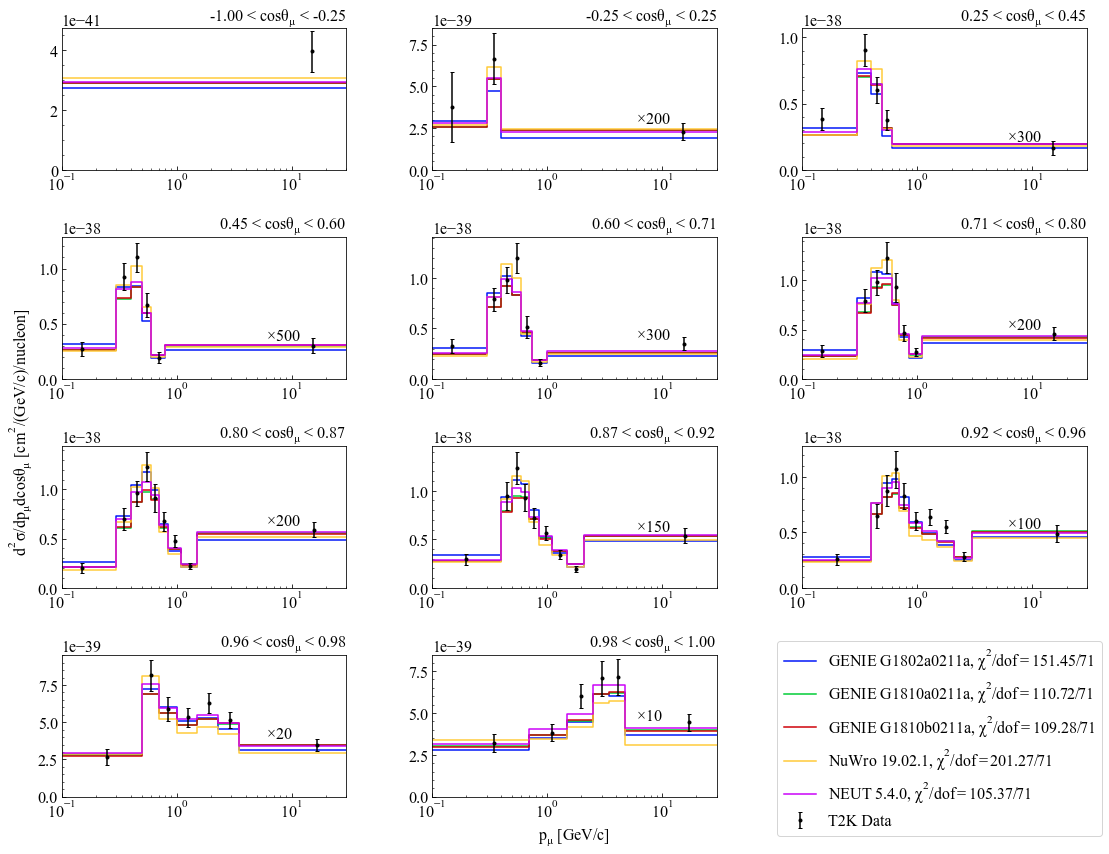

In [372]:
f = uproot.open(gens[0].filename)
objs = map(lambda x: x.decode('utf-8').split(';')[0] , filter(lambda x: 'T2K_CCinc_XSec_2DPcos_nu_nonuniform_Slice' in str(x), f.allkeys()))
f.close()
objs = sorted(filter(lambda x: 'MC' in x, objs), key=lambda x: int(x.split('_')[-2][5:]))

slices = [-1, -0.25, 0.25, 0.45, 0.6, 0.71, 0.8, 0.87, 0.92, 0.96, 0.985, 1]
scales = [None, 200, 300, 500, 300, 200, 200, 150, 100, 20, 10]

fig, axes = plt.subplots(4, 3, figsize=(16,12))

for i, oobj in enumerate(objs):
    for j, gen in enumerate(gens):
        if i > 10: break
        ff = uproot.open(gen.filename)

        # Label with chi2
        label = gen.title
        chi2 = ff['likelihood_hist;1']
        ndof = ff['ndof_hist;1']
        c2n = zip(*(chi2.values, ndof.values))
        chi2s = dict(zip(*(chi2.xlabels, c2n)))
        key = 'T2K_CCinc_XSec_2DPcos_nu_nonuniform'
        label += ', $\\chi^2/dof=%1.2f/%i$' % chi2s[key]

        h, e = ff[oobj].numpy()
        ax = axes.flatten()[i]
        h = np.hstack((h, [h[-1]]))
        
        if scales[i] is not None:
            h[-2:] *= scales[i]

        ax.step(e, h, label=label, where='post', color=colors[j])
        ax.tick_params(direction='in', length=4)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.set_xlim(1e-1, 30)
        ax.set_xscale('log')
        
        ax.set_title(r'%1.2f < $\cos\theta_\mu$ < %1.2f' % (slices[i], slices[i+1]), loc='right', fontsize=16)

        ax.tick_params(direction='in', length=2, which='minor')
        if i == 10:
            ax.set_xlabel(r'$p_\mu$ [GeV/c]')
        if i == 3:
            ax.set_ylabel(r'$d^2\sigma/dp_\mu d\cos\theta_\mu$ [cm$^2$/(GeV/c)/nucleon]', horizontalalignment='right')
        
        if j == 0:
            h, e = ff[oobj.replace('MC', 'data')].numpy()
            err = np.sqrt(ff[oobj.replace('MC', 'data')].variances)
            e = e[:-1] + np.diff(e)/2
            if scales[i] is not None:
                h[-1] *= scales[i]
                err[-1] *= scales[i]
                ax.text(6, h[-1]+(0.01e-38 if i==10 else 0.05e-38), r'$\times$%1.0f' % scales[i], horizontalalignment='left')

            ax.errorbar(e, h, err, fmt='.', color='black', label='T2K Data', zorder=100, capsize=2)

for i, oobj in enumerate(objs):
    ax = axes.flatten()[i]
    ax.set_ylim(0, ax.get_ylim()[1])

fig.delaxes(axes[3,2])
axes[0,0].legend(bbox_to_anchor=(0.97, 0.25), bbox_transform=plt.gcf().transFigure, fontsize=16)
plt.subplots_adjust(top=0.95, bottom=0.06, left=0.06, right=0.95, wspace=0.3, hspace=0.47)

plt.savefig('T2K_CCinc_XSec_2DPcos_nu_nonuniform.pdf')
plt.show()

### MicroBooNE CCinc
MicroBooNE_CCInc_XSec_2DPcos_nu

In [32]:
gens2 = [
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/tensions-plots/nuiscomp-20200907/nuiscomp_genie_g1802a0211a_20200907.root",
      "GENIE G1802a0211a", 600),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/tensions-plots/nuiscomp-20200907/nuiscomp_genie_g1810a0211a_20200907.root",
      "GENIE G1810a0211a", 417),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/tensions-plots/nuiscomp-20200907/nuiscomp_genie_g1810b0211a_20200907.root",
      "GENIE G1810b0211a", 633),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/tensions-plots/nuiscomp-20200907/nuiscomp_nuwro_20200907.root",
      "NuWro 19.02.1", 800),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/tensions-plots/nuiscomp-20200907/nuiscomp_neut_20200907.root",
      "NEUT 5.4.0", 880)
]

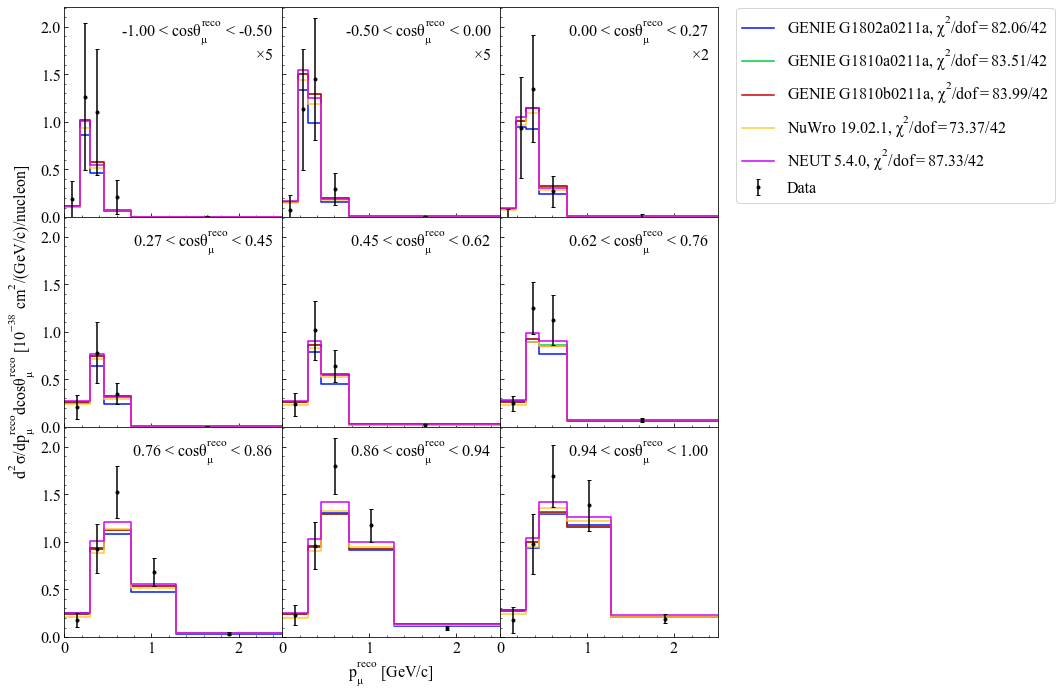

In [222]:
f = uproot.open(gens2[0].filename)
objs = sorted(map(lambda x: x.decode('utf-8').split(';')[0] , filter(lambda x: 'MicroBooNE_CCInc_XSec_2DPcos_nu_MC_Slice' in str(x), f.allkeys())))
f.close()

slices = [-1, -0.5, 0, 0.27, 0.45, 0.62, 0.76, 0.86, 0.94, 1 ]
scales = np.array([5,5,2,1,1,1,1,1,1]) * 1e38

fig, axes = plt.subplots(3, 3, figsize=(15,10), sharey=True, sharex=True)

for i, oobj in enumerate(objs):
    for j, gen in enumerate(gens2):
        ff = uproot.open(gen.filename)

        # Label with chi2
        label = gen.title
        chi2 = ff['likelihood_hist;1']
        ndof = ff['ndof_hist;1']
        c2n = zip(*(chi2.values, ndof.values))
        chi2s = dict(zip(*(chi2.xlabels, c2n)))
        key = 'MicroBooNE_CCInc_XSec_2DPcos_nu'
        label += ', $\\chi^2/dof=%1.2f/%i$' % chi2s[key]
        h, e = ff[oobj].numpy()
        ax = axes.flatten()[i]
        h = np.hstack((h, [h[-1]]))
        h *= scales[i]
        ax.step(e, h, label=label, where='post', color=colors[j])
        ax.set_xlim(e[0], e[-1])  #e[np.maximum(1, np.max(np.argwhere(h>0))-1)])
        ax.tick_params(direction='in', length=4)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        
        #ax.set_title(r'%1.2f < $\cos\theta_\mu^\mathrm{true}$ < %1.2f' % (slices[i], slices[i+1]), loc='right', fontsize=14)

        ax.tick_params(direction='in', length=2, which='minor')
        if i == 7:
            ax.set_xlabel(r'$p_\mu^\mathrm{reco}$ [GeV/c]')
        if i == 3:
            ax.set_ylabel(r'$d^2\sigma/dp_\mu^\mathrm{reco} d\cos\theta_\mu^\mathrm{reco}$ [$10^{-38}$ cm$^2$/(GeV/c)/nucleon]')
        
        if j == 0:
            ax.text(2.4, 1.9, r'%1.2f < $\cos\theta_\mu^\mathrm{reco}$ < %1.2f' % (slices[i], slices[i+1]), horizontalalignment='right')
            ax.text(2.4, 1.65, '' if (scales[i]/1e38) == 1 else (r'$\times%1.0f$' % (scales[i]/1e38)), horizontalalignment='right')

            h, e = ff[oobj.replace('MC', 'data')].numpy()
            err = np.sqrt(ff[oobj.replace('MC', 'data')].variances)
            e = e[:-1] + np.diff(e)/2
            h *= scales[i]
            err *= scales[i]
            ax.errorbar(e, h, err, fmt='.', color='black', label='Data', zorder=100, capsize=2)

for i, oobj in enumerate(objs):
    ax = axes.flatten()[i]
    ax.set_ylim(0, ax.get_ylim()[1])

plt.legend(bbox_to_anchor=(1, 0.96), bbox_transform=plt.gcf().transFigure, fontsize=16)
plt.subplots_adjust(top=0.95, bottom=0.075, left=0.075, right=0.68, wspace=0.0, hspace=0.0)

plt.savefig('MicroBooNE_CCInc_XSec_2DPcos.pdf')
plt.show()

### MINERvA CCinc
MINERvA_CCinc_XSec_2DEavq3_nu

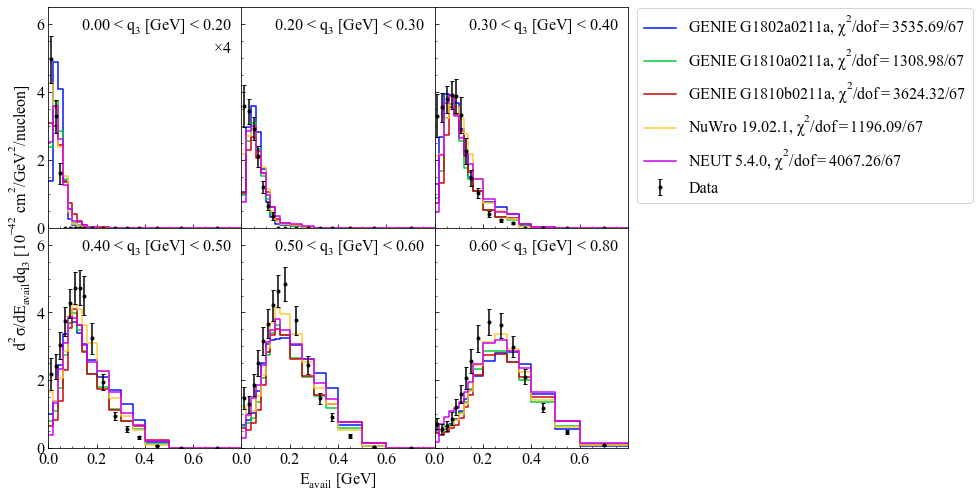

In [232]:
obj = 'MINERvA_CCinc_XSec_2DEavq3_nu_MC'

#slices = [-1, -0.5, 0, 0.27, 0.45, 0.62, 0.76, 0.86, 0.94, 1 ]
scales = np.array([4,1,1,1,1,1]) * 1e42

fig, axes = plt.subplots(2, 3, figsize=(14,7), sharey=True, sharex=True)

for j, gen in enumerate(gens2):
    ff = uproot.open(gen.filename)

    # Label with chi2
    label = gen.title
    chi2 = ff['likelihood_hist;1']
    ndof = ff['ndof_hist;1']
    c2n = zip(*(chi2.values, ndof.values))
    chi2s = dict(zip(*(chi2.xlabels, c2n)))
    key = 'MINERvA_CCinc_XSec_2DEavq3_nu'
    label += ', $\\chi^2/dof=%1.2f/%i$' % chi2s[key]

    hists, ((slices, e),) = ff[obj].numpy()
    dhists, ((dslices, de),) = ff[obj.replace('MC', 'data')].numpy()
    derr = ff[obj.replace('MC', 'data')].variances

    #print(ff[obj].numpy())
    #print(hists)
    #print(slices)
    #print(e)
    
    #hists, (slices, e) = obj[0], obj[1][0]
    
    for i, h in enumerate(hists):
        ax = axes.flatten()[i]
        
        #print(h, e)
        h = np.hstack((h, [h[-1]]))
        h *= scales[i]
        ax.step(e, h, label=label, where='post', color=colors[j])
        ax.set_xlim(e[0], e[-1])  #e[np.maximum(1, np.max(np.argwhere(h>0))-1)])
        ax.tick_params(direction='in', length=4)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        
        #ax.set_title(r'%1.2f < $\cos\theta_\mu^\mathrm{true}$ < %1.2f' % (slices[i], slices[i+1]), loc='right', fontsize=14)

        ax.tick_params(direction='in', length=2, which='minor')
        if i == 4:
            ax.set_xlabel(r'$E_\mathrm{avail}$ [GeV]')
        if i == 0:
            ax.set_ylabel(r'$d^2\sigma/dE_\mathrm{avail} dq_3$ [$10^{-42}$ cm$^2$/GeV$^2$/nucleon]' + ''.join([' ']*20), loc='top')
        
        if j == 0:
            ax.text(0.76, 6-0.2, r'%1.2f < $q_3$ [GeV] < %1.2f' % (slices[i], slices[i+1]), horizontalalignment='right')
            ax.text(0.76, 5.35-0.2, '' if (scales[i]/1e42) == 1 else (r'$\times%1.0f$' % (scales[i]/1e42)), horizontalalignment='right')            
            #hh, ee = ff[obj.replace('MC', 'data')].numpy()
            #err = np.sqrt(ff[obj.replace('MC', 'data')].variances)

            ed = e[:-1] + np.diff(e)/2
            hd = dhists[i] #np.hstack((h, [h[-1]]))
            hd *= scales[i]
            #err *= scales[i]
            err = np.sqrt(derr[i]) * scales[i]
            ax.errorbar(ed, hd, err, fmt='.', color='black', label='Data', zorder=100, capsize=2)

for i, ax in enumerate(plt.gcf().axes):
    #ax = axes.flatten()[i]
    ax.set_ylim(0, 6.5)
    ax.xaxis.set_major_locator(MaxNLocator(5, prune='upper'))

plt.legend(bbox_to_anchor=(1, 0.965), bbox_transform=plt.gcf().transFigure, fontsize=16)
plt.subplots_adjust(top=0.95, bottom=0.075, left=0.075, right=0.65, wspace=0.0, hspace=0.0)

plt.savefig('MINERvA_CCinc_XSec_2DEavq3_nu.pdf')
plt.show()

### MINERvA CC0pi
MINERvA_CC0pi_XSec_2Dptpz_nu

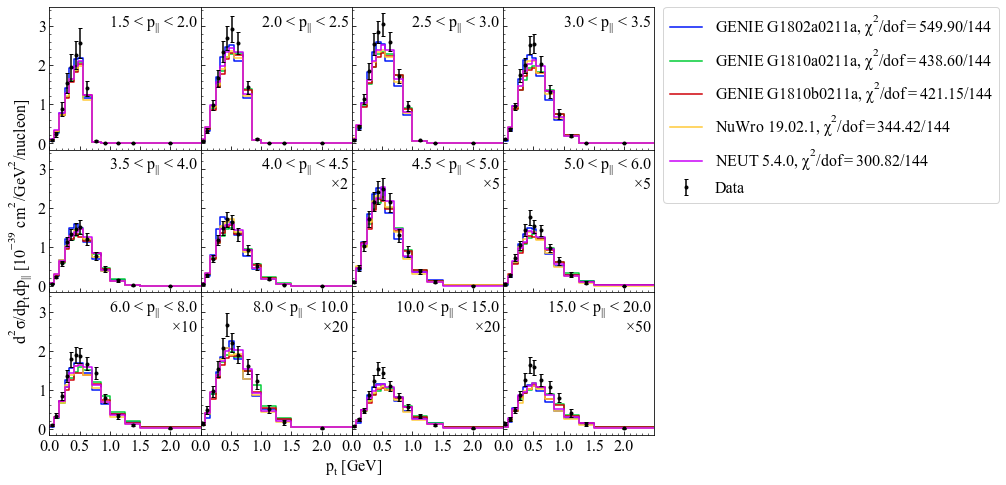

In [251]:
obj = 'MINERvA_CC0pi_XSec_2Dptpz_nu_MC'

#slices = [-1, -0.5, 0, 0.27, 0.45, 0.62, 0.76, 0.86, 0.94, 1 ]
scales = np.array([1,1,1,1, 1,2,5,5, 10,20,20,50]) * 1e39

fig, axes = plt.subplots(3,4, figsize=(14,7), sharey=True, sharex=True)

for j, gen in enumerate(gens2):
    ff = uproot.open(gen.filename)

    # Label with chi2
    label = gen.title
    chi2 = ff['likelihood_hist;1']
    ndof = ff['ndof_hist;1']
    c2n = zip(*(chi2.values, ndof.values))
    chi2s = dict(zip(*(chi2.xlabels, c2n)))
    key = 'MINERvA_CC0pi_XSec_2Dptpz_nu'
    label += ', $\\chi^2/dof=%1.2f/%i$' % chi2s[key]

    hists, ((slices, e),) = ff[obj].numpy()
    dhists, ((dslices, de),) = ff[obj.replace('MC', 'data')].numpy()
    derr = ff[obj.replace('MC', 'data')].variances

    #print(ff[obj].numpy())
    #print(hists)
    #print(slices)
    #print(e)
    
    #hists, (slices, e) = obj[0], obj[1][0]
    
    for i, h in enumerate(hists):
        ax = axes.flatten()[i]
        
        #print(h, e)
        h = np.hstack((h, [h[-1]]))
        h *= scales[i]
        ax.step(e, h, label=label, where='post', color=colors[j])
        ax.set_xlim(e[0], e[-1])  #e[np.maximum(1, np.max(np.argwhere(h>0))-1)])
        ax.tick_params(direction='in', length=4)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        
        #ax.set_title(r'%1.2f < $\cos\theta_\mu^\mathrm{true}$ < %1.2f' % (slices[i], slices[i+1]), loc='right', fontsize=14)

        ax.tick_params(direction='in', length=2, which='minor')
        if i == 10:
            ax.set_xlabel(r'$p_t$ [GeV]' + ''.join([' ']*12), horizontalalignment='right')
        if i == 4:
            ax.set_ylabel(r'$d^2\sigma/dp_t dp_{||}$ [$10^{-39}$ cm$^2$/GeV$^2$/nucleon]')
        
        if j == 0:
            ax.text(2.45, 3, r'%1.1f < $p_{||}$ < %1.1f' % (slices[i], slices[i+1]), horizontalalignment='right')
            ax.text(2.45, 2.5, '' if (scales[i]/1e39) == 1 else (r'$\times%1.0f$' % (scales[i]/1e39)), horizontalalignment='right')            
            #hh, ee = ff[obj.replace('MC', 'data')].numpy()
            #err = np.sqrt(ff[obj.replace('MC', 'data')].variances)

            ed = e[:-1] + np.diff(e)/2
            hd = dhists[i] #np.hstack((h, [h[-1]]))
            hd *= scales[i]
            #err *= scales[i]
            err = np.sqrt(derr[i]) * scales[i]
            ax.errorbar(ed, hd, err, fmt='.', color='black', label='Data', zorder=100, capsize=2)

for i, ax in enumerate(plt.gcf().axes):
    #ax = axes.flatten()[i]
    #ax.set_ylim(0, 3.5)
    ax.xaxis.set_major_locator(MaxNLocator(5, prune='upper'))

plt.legend(bbox_to_anchor=(1, 0.965), bbox_transform=plt.gcf().transFigure, fontsize=16)
plt.subplots_adjust(top=0.95, bottom=0.1, left=0.05, right=0.65, wspace=0.0, hspace=0.0)

plt.savefig('MINERvA_CC0pi_XSec_2Dptpz_nu.pdf')
plt.show()

## STVs

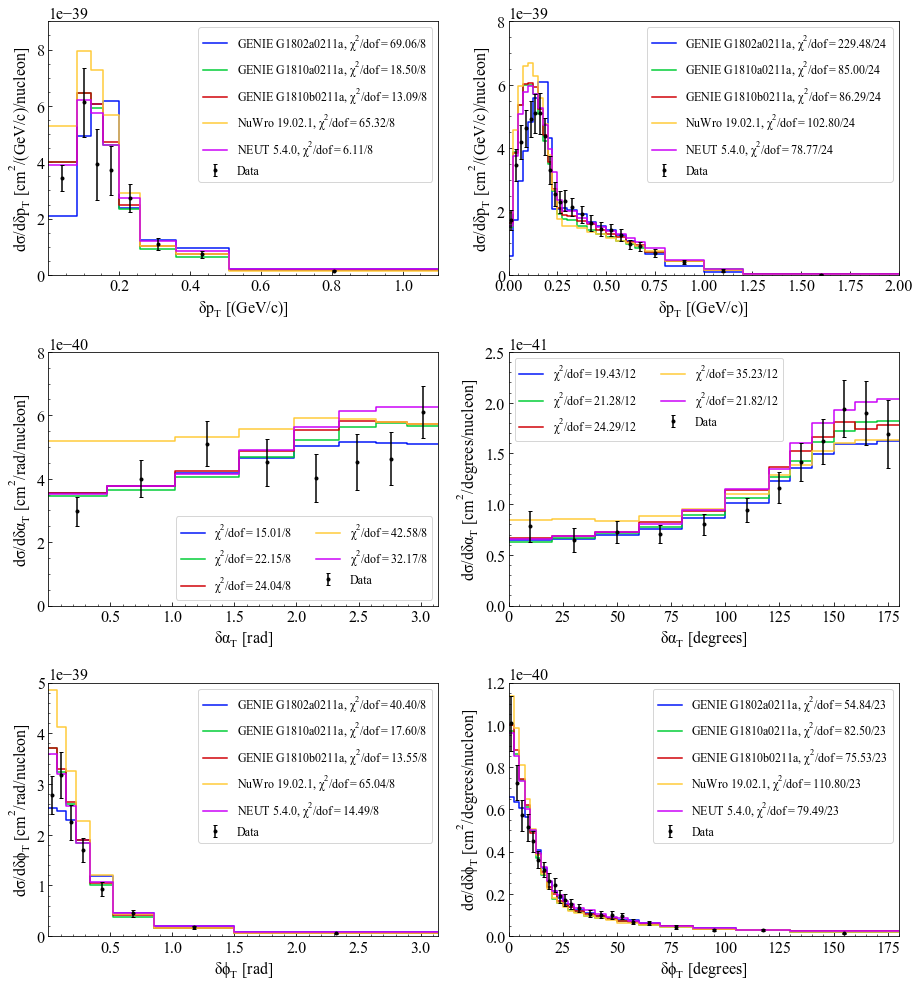

In [308]:
objs = [
    ('T2K_CC0pinp_STV_XSec_1Ddpt_nu', r'\delta p_T', '(GeV/c)', 'upper right', 0, 9e-39),
    ('MINERvA_CC0pinp_STV_XSec_1Ddpt_nu', r'\delta p_T', '(GeV/c)', 'upper right', 0, 8e-39),
    ('T2K_CC0pinp_STV_XSec_1Ddat_nu', r'\delta\alpha_T', 'rad', 'lower right', 0, 0.8e-39),
    ('MINERvA_CC0pinp_STV_XSec_1Ddalphat_nu', r'\delta\alpha_T', 'degrees', 'upper left', 0, 2.5e-41),
    ('T2K_CC0pinp_STV_XSec_1Ddphit_nu', r'\delta\phi_T', 'rad', 'upper right', 0, 5e-39),
    ('MINERvA_CC0pinp_STV_XSec_1Ddphit_nu', r'\delta\phi_T', 'degrees', 'upper right', 0, 1.2e-40),
]

fig, axes = plt.subplots(3,2, figsize=(13,14))

for j, gen in enumerate(gens2):
    ff = uproot.open(gen.filename)

    for i, (obj, var, unit, loc, ymin, ymax) in enumerate(objs):
        # Label with chi2
        label = gen.title
        chi2 = ff['likelihood_hist;1']
        ndof = ff['ndof_hist;1']
        c2n = zip(*(chi2.values, ndof.values))
        chi2s = dict(zip(*(chi2.xlabels, c2n)))
        chi2label = '$\\chi^2/dof=%1.2f/%i$' % chi2s[obj]
        label = label + ', ' + chi2label if (i!=2 and i!=3) else chi2label

        h, e = ff[obj+'_MC'].numpy()
        ax = axes.flatten()[i]
        h = np.hstack((h, [h[-1]]))
        #h *= scales[i]
        ax.step(e, h, label=label, where='post', color=colors[j])
        ax.set_xlim(e[0], e[-1])  #e[np.maximum(1, np.max(np.argwhere(h>0))-1)])
        ax.tick_params(direction='in', length=4)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

        #ax.set_title(r'%1.2f < $\cos\theta_\mu^\mathrm{true}$ < %1.2f' % (slices[i], slices[i+1]), loc='right', fontsize=14)

        ax.tick_params(direction='in', length=2, which='minor')
        ax.set_xlabel(r'$%s$ [%s]' % (var, unit))
        ax.set_ylabel(r'$d\sigma/d%s$ [cm$^2$/%s/nucleon]' % (var, unit))

        if j == 0:
            h, e = ff[obj+'_data'].numpy()
            err = np.sqrt(ff[obj+'_data'].variances)
            e = e[:-1] + np.diff(e)/2
            #h *= scales[i]
            #err *= scales[i]
            ax.errorbar(e, h, err, fmt='.', color='black', label='Data', zorder=100, capsize=2)
    
        ax.legend(loc=loc, fontsize=12, ncol=2 if (i==2 or i==3) else 1)
        ax.set_ylim(ymin, ymax)

#plt.subplots_adjust(top=0.95, bottom=0.075, left=0.075, right=0.68, wspace=0.0, hspace=0.0)
plt.tight_layout()
plt.savefig('STV_CC0pinp.pdf')
plt.show()

### T2K CC1pip 
T2K_CC1pip_CH_XSec_2Dpmucosmu_nu

In [315]:
gens = [
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/tensions-plots/nuiscomp-20200907/nuiscomp_genie_g1802a0211a_20200907.root",
      "GENIE G1802a0211a", 600),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/tensions-plots/nuiscomp-20200907/nuiscomp_genie_g1810a0211a_20200907.root",
      "GENIE G1810a0211a", 417),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/tensions-plots/nuiscomp-20200907/nuiscomp_genie_g1810b0211a_20200907.root",
      "GENIE G1810b0211a", 633),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/tensions-plots/nuiscomp-20200907/nuiscomp_nuwro_20200907.root",
      "NuWro 19.02.1", 800),
    Generator(
      "/Users/mastbaum/uboone/xs/tensions/tensions-plots/nuiscomp-20200907/nuiscomp_neut_20200907.root",
      "NEUT 5.4.0", 880)
]

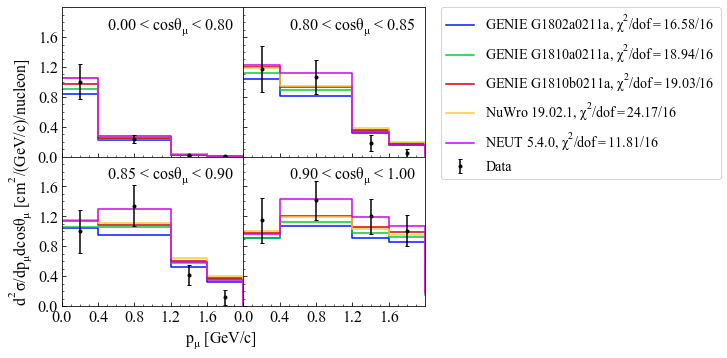

In [365]:
f = uproot.open(gens[0].filename)
objs = sorted(map(lambda x: x.decode('utf-8').split(';')[0] , filter(lambda x: 'T2K_CC1pip_CH_XSec_2Dpmucosmu_nu_mc_slice' in str(x), f.allkeys())))
f.close()

slices = [0, 0.8, 0.85, 0.9, 1]
scale = 1e39

fig, axes = plt.subplots(2, 2, figsize=(10,5), sharex=True, sharey=True)

for i, oobj in enumerate(objs):
    for j, gen in enumerate(gens):
        ff = uproot.open(gen.filename)

        # Label with chi2
        label = gen.title
        chi2 = ff['likelihood_hist;1']
        ndof = ff['ndof_hist;1']
        c2n = zip(*(chi2.values, ndof.values))
        chi2s = dict(zip(*(chi2.xlabels, c2n)))
        key = 'T2K_CC1pip_CH_XSec_2Dpmucosmu_nu'
        label += ', $\\chi^2/dof=%1.2f/%i$' % chi2s[key]

        h, e = ff[oobj].numpy()
        ax = axes.flatten()[i]
        h = np.hstack((h, [h[-1]])) * scale
        ax.step(e, h, label=label, where='post', color=colors[j])
        ax.set_xlim(e[0], e[np.maximum(1, np.max(np.argwhere(h>0))-1)])
        ax.tick_params(direction='in', length=4)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        
        #ax.set_title(r'%1.2f < $\cos\theta_\mu^\mathrm{true}$ < %1.2f' % (slices[i], slices[i+1]), loc='right', fontsize=14)

        if j == 0:
            
            ax.text(1.9, 1.7, r'%1.2f < $cos\theta_\mu$ < %1.2f' % (slices[i], slices[i+1]), horizontalalignment='right')

        
        ax.tick_params(direction='in', length=2, which='minor')
        if i == 3:
            ax.set_xlabel(r'$p_\mu$ [GeV/c]'+ ''.join([' ']*20), horizontalalignment='right')
        if i == 2:
            ax.set_ylabel(r'$d^2\sigma/dp_\mu d\cos\theta_\mu$ [cm$^2$/(GeV/c)/nucleon]', loc='bottom')#, horizontalalignment='left')
        
        if j == 0:
            h, e = ff[oobj.replace('mc', 'data')].numpy()
            h *= scale
            err = np.sqrt(ff[oobj.replace('mc', 'data')].variances) * scale
            e = e[:-1] + np.diff(e)/2
            ax.errorbar(e, h, err, fmt='.', color='black', label='Data', zorder=100, capsize=2)

for i, oobj in enumerate(objs):
    ax = axes.flatten()[i]
    ax.set_ylim(0, 2)
    ax.xaxis.set_major_locator(MaxNLocator(5, prune='upper'))
    ax.yaxis.set_major_locator(MaxNLocator(5, prune='upper'))


plt.legend(bbox_to_anchor=(1, 0.97), bbox_transform=plt.gcf().transFigure, fontsize=14)
plt.subplots_adjust(top=0.95, bottom=0.12, left=0.075, right=0.58, wspace=0, hspace=0)

plt.savefig('T2K_CC1pip_CH_XSec_2Dpmucosmu.pdf')
plt.show()